In [6]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.figure import Figure

In [7]:
# Define the function used in Newton's method
def f(x):
    return x**6 + x**5 + x**4 + x**3 + x**2 + x

# Derivative of the function
def df(x):
    return 6*x**5 + 5*x**4 + 4*x**3 + 3*x**2 + 2*x + 1

Welcome to the Fractal Visualizer!
You can explore either a Mandelbrot-type fractal or Newton Basins.
Let's set the parameters first.

→ The complex plane will be scanned by real (p) and imaginary (q) values.

→ Resolution settings (number of points to calculate in each direction):

--- Summary of Your Settings ---
pmin: -2.5
pmax: 1.5
qmin: -2.0
qmax: 2.0
ppoints: 200
qpoints: 200
max_iterations: 300
infinity_border: 10

→ Now choose which fractal to generate:

Generating fractal: Newton Basins... please wait!


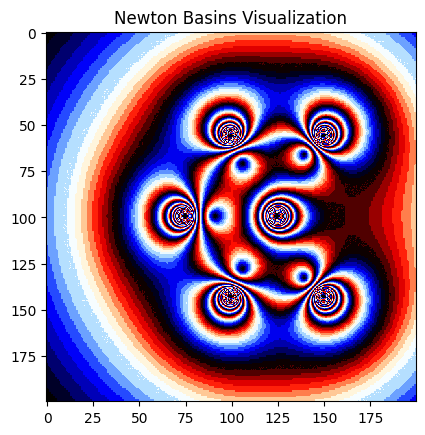

In [8]:
# --- Introduction ---
print("Welcome to the Fractal Visualizer!")
print("You can explore either a Mandelbrot-type fractal or Newton Basins.")
print("Let's set the parameters first.\n")

# --- User input section ---
print("→ The complex plane will be scanned by real (p) and imaginary (q) values.")

pmin = float(input("Enter minimum value for real axis (pmin), e.g. -2.5: "))
pmax = float(input("Enter maximum value for real axis (pmax), e.g. 1.5: "))

qmin = float(input("Enter minimum value for imaginary axis (qmin), e.g. -2.0: "))
qmax = float(input("Enter maximum value for imaginary axis (qmax), e.g. 2.0: "))

print("\n→ Resolution settings (number of points to calculate in each direction):")
ppoints = int(input("Number of vertical points (height), e.g. 200: "))
qpoints = int(input("Number of horizontal points (width), e.g. 200: "))

max_iterations = int(input("\n→ Maximum number of iterations per point, e.g. 300: "))
infinity_border = int(input("→ Threshold distance to consider a point as diverged (infinity), e.g. 10: "))

# Save inputs in a dictionary
V = {
    'pmin': pmin, 'pmax': pmax,
    'qmin': qmin, 'qmax': qmax,
    'ppoints': ppoints, 'qpoints': qpoints,
    'max_iterations': max_iterations,
    'infinity_border': infinity_border
}

# Confirm input
print("\n--- Summary of Your Settings ---")
for key, value in V.items():
    print(f"{key}: {value}")

# Choose the fractal type
print("\n→ Now choose which fractal to generate:")
frac = input('Type **Newton Basins** or **Mandelbrot-type set**: ').strip()

# Initialize result array
image = np.zeros((V['ppoints'], V['qpoints']))

# --- Fractal generation ---
print(f"\nGenerating fractal: {frac}... please wait!")

if frac.lower().startswith("newton"):
    # Newton Basins
    p, q = np.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
    c = p + 1j * q
    z = np.zeros_like(c)

    for k in range(max_iterations):
        z = z - f(c) / df(c)
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan

else:
    # Mandelbrot-like set
    for ip, p in enumerate(np.linspace(pmin, pmax, ppoints)):
        for iq, q in enumerate(np.linspace(qmin, qmax, qpoints)):
            c = p + 1j * q
            z = 0
            for k in range(max_iterations):
                z = z**2 + c
                if abs(z) > infinity_border:
                    image[ip, iq] = k
                    break

# --- Visualization ---
fig = Figure()
ax = fig.subplots()
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(-image.T, cmap='flag')  # Use transposed image for correct orientation
plt.title(f"{frac} Visualization")
plt.show()